c:\Users\Asus\OneDrive\Desktop\Text To Image\pytorch-stable-diffusion\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Asus\AppData\Local\Temp\ipykernel_3760\1648254711.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 50/50 [09:36<00:00, 11.54s/it]


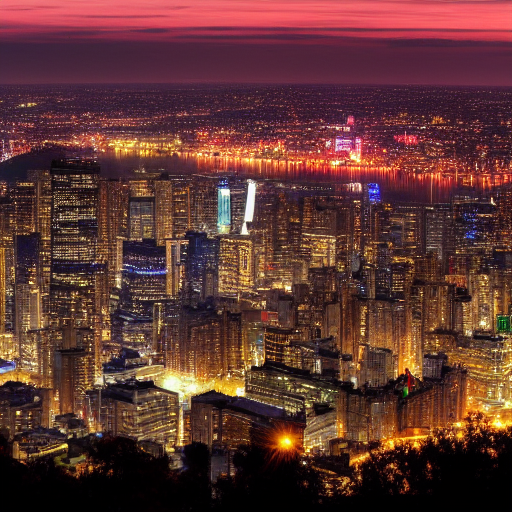

In [5]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A beautiful night city"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [7]:
from pathlib import Path

# Define the directory where you want to save the generated image
generated_image_folder = Path("../Generated Images")

# Create the directory if it doesn't exist
generated_image_folder.mkdir(parents=True, exist_ok=True)

# Specify the full path of the generated image
output_image_path = generated_image_folder / "generated_image.png"

# Save the generated image
output_image.save(output_image_path)

print(f"Image saved at: {output_image_path}")


AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [1]:
pip install pytorch-fid

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from fid import fid_score  # Ensure the 'pytorch-fid' package is installed

# Set device to CPU or CUDA
DEVICE = "cpu"

# Save generated image
generated_image_folder = Path("../Generated Image")
generated_image_folder.mkdir(parents=True, exist_ok=True)
output_image_path = generated_image_folder / "generated_image.png"
output_image.save(output_image_path)
print(f"Generated image saved at: {output_image_path}")

# Path to real images
real_images_folder = Path("../Real Images")

# Check if the paths exist
if not real_images_folder.exists() or not generated_image_folder.exists():
    raise FileNotFoundError("One of the image folders does not exist.")

# Function to load images from folder and convert to numpy array
def load_images(folder):
    images = []
    for file in folder.glob("*.png"):  # Assuming images are in PNG format
        img = Image.open(file).convert("RGB")
        img = np.array(img)
        images.append(img)
    return np.array(images)

# Load real and generated images
real_images = load_images(real_images_folder)
generated_images = load_images(generated_image_folder)

# Calculate FID score
fid_value = fid_score.calculate_fid_given_images(real_images, generated_images, DEVICE)
print(f"FID Score: {fid_value}")


ModuleNotFoundError: No module named 'fid'

In [4]:
print(type(output_image))  # Should output <class 'PIL.Image.Image'>


NameError: name 'output_image' is not defined